In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse

In [2]:
train_data = pd.read_csv("data/training_set_VU_DM.csv")
test_data = pd.read_csv("data/test_set_VU_DM.csv")

print("Train size:", train_data.shape)
print("Test size:", test_data.shape)

Train size: (4958347, 54)
Test size: (4959183, 50)


In [4]:
train_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [6]:
#percenteage of empty data per column
train_data.isna().sum() * 100 / len(train_data)

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.920364
visitor_hist_adr_usd           94.897735
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affin

In [7]:
#merge competitors data
train_data['comp'] = train_data[[x for x in train_data.columns if "inv" in x or "rate" in x and "percent_diff" not in x]].sum(axis=1, skipna = True)
test_data['comp'] = test_data[[x for x in test_data.columns if "inv" in x or "rate" in x and "percent_diff" not in x]].sum(axis=1, skipna = True)

In [8]:
#remove original competitors data
train_data.drop([x for x in train_data.columns if "inv" in x or "rate" in x or "percent_diff" in x],axis = 1,inplace = True)
test_data.drop([x for x in test_data.columns if "inv" in x or "rate" in x or "percent_diff" in x],axis = 1,inplace = True)

In [9]:
#differenced historical data
train_data['starrating_diff'] = np.abs(train_data['visitor_hist_starrating'] - train_data['prop_starrating'])
train_data['usd_diff'] = np.abs(train_data['visitor_hist_adr_usd'] - train_data['price_usd'])

test_data['starrating_diff'] = np.abs(test_data['visitor_hist_starrating'] - test_data['prop_starrating'])
test_data['usd_diff'] = np.abs(test_data['visitor_hist_adr_usd'] - test_data['price_usd'])

In [10]:
train_data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'gross_bookings_usd', 'booking_bool', 'comp', 'starrating_diff',
       'usd_diff'],
      dtype='object')

In [11]:
# Create new features for the properties based on the numeric values (mean, median, std)
for var in ['prop_starrating', 'prop_review_score',
                    'prop_log_historical_price', 'prop_location_score1']:

        mean_train = train_data.groupby("prop_id")[str(var)].mean()
        median_train = train_data.groupby("prop_id")[str(var)].median()
        std_train = train_data.groupby("prop_id")[str(var)].std()
        mean_test = test_data.groupby("prop_id")[str(var)].mean()
        median_test = test_data.groupby("prop_id")[str(var)].median()
        std_test = test_data.groupby("prop_id")[str(var)].std()

        train_data[str(var) + "_mean"] = mean_train[train_data.prop_id].values
        train_data[str(var) + "_median"] = median_train[train_data.prop_id].values
        train_data[str(var) + "_std"] = std_train[train_data.prop_id].values
        test_data[str(var) + "_mean"] = mean_test[test_data.prop_id].values
        test_data[str(var) + "_median"] = median_test[test_data.prop_id].values
        test_data[str(var) + "_std"] = std_test[test_data.prop_id].values


In [13]:
#extract month, weekday, day in month, hour and remove exact date

from datetime import datetime
train_data['date_time']= pd.to_datetime(train_data['date_time'])
train_data['month'] = pd.to_datetime(train_data['date_time']).dt.month
train_data['weekday'] = pd.to_datetime(train_data['date_time']).dt.weekday
train_data['day_of_month'] = pd.to_datetime(train_data['date_time']).dt.day
train_data = train_data.drop(['date_time'], axis = 1)

test_data['date_time']= pd.to_datetime(test_data['date_time'])
test_data['month'] = pd.to_datetime(test_data['date_time']).dt.month
test_data['weekday'] = pd.to_datetime(test_data['date_time']).dt.weekday
test_data['day_of_month'] = pd.to_datetime(test_data['date_time']).dt.day
test_data = test_data.drop(['date_time'], axis = 1)

In [14]:
#drop columns with over 50% empty
train_data = train_data.drop(['srch_query_affinity_score','visitor_hist_starrating', 'visitor_hist_adr_usd','gross_bookings_usd'], axis = 1)
test_data = test_data.drop(['srch_query_affinity_score','visitor_hist_starrating', 'visitor_hist_adr_usd'], axis = 1)

In [15]:
#Fill missing data of score, location score and distance
train_data["prop_location_score2"] = train_data["prop_location_score2"].fillna(train_data.groupby("prop_country_id")["prop_location_score2"].transform('mean'))
train_data["prop_review_score"] = train_data["prop_review_score"].fillna(train_data.groupby("prop_country_id")["prop_review_score"].transform('min'))
train_data['orig_destination_distance'] = train_data['orig_destination_distance'].fillna(train_data.groupby("prop_country_id")['orig_destination_distance'].transform('mean'))

test_data["prop_location_score2"] = test_data["prop_location_score2"].fillna(test_data.groupby("prop_country_id")["prop_location_score2"].transform('mean'))
test_data["prop_review_score"] = test_data["prop_review_score"].fillna(test_data.groupby("prop_country_id")["prop_review_score"].transform('min'))
test_data['orig_destination_distance'] = test_data['orig_destination_distance'].fillna(test_data.groupby("prop_country_id")['orig_destination_distance'].transform('mean'))

In [16]:
#Convert historical price (log) to regular price
train_data['prop_log_historical_price'] = np.exp(train_data['prop_log_historical_price'])
test_data['prop_log_historical_price'] = np.exp(test_data['prop_log_historical_price'])

In [17]:
#Function to normalize features on set1 and set12 with respect to features on columns 1 and 2

from sklearn.preprocessing import StandardScaler
def normalize_wrt_column(df,column):
        norm_wrt1 = ['srch_id','site_id','month','srch_length_of_stay', 'weekday', 'day_of_month']
        norm_wrt2 = ['prop_country_id','prop_id','srch_destination_id']
        feat1 = ['prop_starrating','prop_review_score', 'prop_location_score1', 'prop_location_score2',
                'prop_log_historical_price', 'orig_destination_distance']
        feat12 = feat1 + ['srch_length_of_stay', 'srch_booking_window','srch_adults_count', 'srch_children_count',
                'srch_room_count']
        standardscaler = StandardScaler()
        ids = list(set(df.loc[:,column]))
        if column in norm_wrt1:
            feat1.insert(0,str(column))
            df = df.loc[:,feat1]
            for i in ids:
                df.loc[df.loc[:,column]==i,feat1] = standardscaler.fit_transform(df.loc[df.loc[:,column]==i,feat1])
        if column in norm_wrt2:
            feat12.insert(0,str(column))
            df = df.loc[:,feat12]
            for i in ids:
                df.loc[df.loc[:,column]==i,feat12] = standardscaler.fit_transform(df.loc[df.loc[:,column]==i,feat12])
        return df

#Normalization on train data

df_site_id = normalize_wrt_column(train_data,'site_id')
df_site_id = df_site.add_suffix('_wrt_site_id')
                                
df_prop_country = normalize_wrt_column(train_data,'prop_country_id')
df_prop_country = df_propc.add_suffix('_wrt_prop_country_id')
                                
df_destination = normalize_wrt_column(train_data,'srch_destination_id')
df_destination = df_dest.add_suffix('_wrt_srch_destination_id')

df_month = normalize_wrt_column(train_data,'month')
df_month = df_month.add_suffix('_wrt_month')

df_length_stay = normalize_wrt_column(train_data,'srch_length_of_stay')
df_length_stay = df_length.add_suffix('_wrt_srch_length_of_stay')

""""
print('Normalize wrt to weekday')
df_week = normalize_wrt_column(train_data,'weekday')
df_week = df_week.add_suffix('_wrt_weekday')

print('Normalize wrt to day_of_month')
df_day = normalize_wrt_column(train_data,'day_of_month')
df_day = df_day.add_suffix('_wrt_day_of_month')
"""

#Concatenate normalization frames

df_norm_train= pd.concat([train_data,df_site.iloc[:,1:len(df_site_id.columns)]],axis=1)
df_norm_train= pd.concat([df_norm_train,df_propc.iloc[:,1:len(df_prop_country.columns)]],axis=1)
df_norm_train= pd.concat([df_norm_train,df_dest.iloc[:,1:len(df_destination.columns)]],axis=1)
df_norm_train = pd.concat([df_norm_train,df_month.iloc[:,1:len(df_month.columns)]],axis=1)
df_norm_train = pd.concat([df_norm_train,df_length_stay.iloc[:,1:len(df_length.columns)]],axis=1)

""""
print('Concatenating weekday normalizations')
df_norm_train = pd.concat([df_norm_train,df_week.iloc[:,1:len(df_week.columns)]],axis=1)

print('Concatenating day normalizations')
df_norm_train = pd.concat([df_norm_train,df_day.iloc[:,1:len(df_day.columns)]],axis=1)
"""

Normalize wrt to site_id
Normalize wrt to prop_country_id


c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-p

Normalize wrt to srch_destination_id


c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-p

Normalize wrt to month
Normalize wrt to srch_length_of_stay
Normalize wrt to weekday
Normalize wrt to day_of_month
Concatenating site normalizations
Concatenating prop_country normalizations
Concatenating srch_destination normalizations
Concatenating month normalizations
Concatenating srch_length normalizations
Concatenating weekday normalizations
Concatenating day normalizations


In [18]:
df_norm_train.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       ...
       'prop_log_historical_price_wrt_weekday',
       'orig_destination_distance_wrt_weekday', 'price_usd_wrt_weekday',
       'prop_starrating_wrt_day_of_month',
       'prop_review_score_wrt_day_of_month',
       'prop_location_score1_wrt_day_of_month',
       'prop_location_score2_wrt_day_of_month',
       'prop_log_historical_price_wrt_day_of_month',
       'orig_destination_distance_wrt_day_of_month',
       'price_usd_wrt_day_of_month'],
      dtype='object', length=102)

In [19]:
#Normalize test data

df_site_id = normalize_wrt_column(test_data,'site_id')
df_site_id = df_site.add_suffix('_wrt_site_id')
                                
df_propc = normalize_wrt_column(test_data,'prop_country_id')
df_propc = df_propc.add_suffix('_wrt_prop_country_id')
                                
df_destination = normalize_wrt_column(test_data,'srch_destination_id')
df_destination = df_dest.add_suffix('_wrt_srch_destination_id')

df_month = normalize_wrt_column(test_data,'month')
df_month = df_month.add_suffix('_wrt_month')

df_length_stay = normalize_wrt_column(test_data,'srch_length_of_stay')
df_length_stay = df_length.add_suffix('_wrt_srch_length_of_stay')

""""
print('Normalize wrt to weekday')
df_week = normalize_wrt_column(test_data,'weekday')
df_week = df_week.add_suffix('_wrt_weekday')

print('Normalize wrt to day_of_month')
df_day = normalize_wrt_column(test_data,'day_of_month')
df_day = df_day.add_suffix('_wrt_day_of_month')
"""

#Concatenate normalization frames

df_norm_test = pd.concat([test_data,df_site.iloc[:,1:len(df_site_id.columns)]],axis=1)
df_norm_test= pd.concat([df_norm_test,df_propc.iloc[:,1:len(df_prop_country.columns)]],axis=1)
df_norm_test= pd.concat([df_norm_test,df_dest.iloc[:,1:len(df_destination.columns)]],axis=1)
df_norm_test = pd.concat([df_norm_test,df_month.iloc[:,1:len(df_month.columns)]],axis=1)
df_norm_test = pd.concat([df_norm_test,df_length_stay.iloc[:,1:len(df_length.columns)]],axis=1)

""""
print('Concatenating weekday normalizations')
df_norm_test = pd.concat([df_norm_test,df_week.iloc[:,1:len(df_week.columns)]],axis=1)

print('Concatenating day normalizations')
df_norm_test = pd.concat([df_norm_test,df_day.iloc[:,1:len(df_day.columns)]],axis=1)
"""

Normalize wrt to site_id
Normalize wrt to prop_country_id


c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-p

Normalize wrt to srch_destination_id


c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\Pablo\anaconda3\envs\py37\lib\site-p

Normalize wrt to month
Normalize wrt to srch_length_of_stay
Normalize wrt to weekday
Normalize wrt to day_of_month
Concatenating site normalizations
Concatenating prop_country normalizations
Concatenating srch_destination normalizations
Concatenating month normalizations
Concatenating srch_length normalizations
Concatenating weekday normalizations
Concatenating day normalizations


In [20]:
df_norm_test.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'comp', 'starrating_diff', 'usd_diff', 'prop_starrating_mean',
       'prop_starrating_median', 'prop_starrating_std',
       'prop_review_score_mean', 'prop_review_score_median',
       'prop_review_score_std', 'prop_log_historical_price_mean',
       'prop_log_historical_price_median', 'prop_log_historical_price_std',
       'prop_location_score1_mean', 'prop_location_score1_median',
       'prop_location_score1_std', 'month', 'weekday', 'day_of_month',
       'prop_starrating_wrt_si

In [21]:
#See if price is per night or per stay.
#First, see mean price for each hotel for each length of stay
train_data =  df_norm_train.copy()
grouped_hotel = train_data.groupby(["prop_id"])
#means = train_data.groupby(["prop_id", "srch_length_of_stay"])["price_usd"].transform('mean')

for idx, group in grouped_hotel:
    grouped_price = group.groupby(["srch_length_of_stay"], as_index = False)["price_usd"].mean()
    if len(grouped_price) > 1:
        slope = (grouped_price.price_usd.values[-1] - grouped_price.price_usd.values[0])/(grouped_price.srch_length_of_stay.values[-1] - grouped_price.srch_length_of_stay.values[0])
        if 1 not in grouped_price.srch_length_of_stay.values:
            intercept = grouped_price.price_usd.values[-1] - slope*grouped_price.srch_length_of_stay.values[-1]
            grouped_price.srch_length_of_stay.values[0] = 1
            grouped_price.price_usd.values[0] = slope+intercept
        if slope > 0.3 * grouped_price.price_usd.values[0]:
            train_data.price_usd.loc[train_data.prop_id == idx] = train_data.price_usd.loc[train_data.prop_id == idx]/train_data.srch_length_of_stay.loc[train_data.prop_id == idx]
        
    #for price in grouped_price:
        #print(price)
#For each hotel and length, substract to it the mean of that hotel for 1 night, if negative -> price per night (leave it)
#if positive -> per stay (divide by length of stay)

c:\Users\Pablo\anaconda3\envs\py37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
test_data =  df_norm_test.copy()
grouped_hotel = test_data.groupby(["prop_id"])
#means = train_data.groupby(["prop_id", "srch_length_of_stay"])["price_usd"].transform('mean')

for idx, group in grouped_hotel:
    grouped_price = group.groupby(["srch_length_of_stay"], as_index = False)["price_usd"].mean()
    if len(grouped_price) > 1:
        slope = (grouped_price.price_usd.values[-1] - grouped_price.price_usd.values[0])/(grouped_price.srch_length_of_stay.values[-1] - grouped_price.srch_length_of_stay.values[0])
        if 1 not in grouped_price.srch_length_of_stay.values:
            intercept = grouped_price.price_usd.values[-1] - slope*grouped_price.srch_length_of_stay.values[-1]
            grouped_price.srch_length_of_stay.values[0] = 1
            grouped_price.price_usd.values[0] = slope+intercept
        if slope > 0.3 * grouped_price.price_usd.values[0]:
            test_data.price_usd.loc[test_data.prop_id == idx] = test_data.price_usd.loc[test_data.prop_id == idx]/test_data.srch_length_of_stay.loc[test_data.prop_id == idx]

In [23]:
#Create score column on which the ranking is based

train_data['score'] = np.fmax((5 * train_data['booking_bool']).values, train_data['click_bool'].values)

In [24]:
train_data.columns
test_data.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'comp', 'starrating_diff', 'usd_diff', 'prop_starrating_mean',
       'prop_starrating_median', 'prop_starrating_std',
       'prop_review_score_mean', 'prop_review_score_median',
       'prop_review_score_std', 'prop_log_historical_price_mean',
       'prop_log_historical_price_median', 'prop_log_historical_price_std',
       'prop_location_score1_mean', 'prop_location_score1_median',
       'prop_location_score1_std', 'month', 'weekday', 'day_of_month',
       'prop_starrating_wrt_si

In [25]:
from sklearn.preprocessing import StandardScaler

prop_info= ['prop_starrating','prop_review_score', 'prop_location_score1', 'prop_location_score2',
                'prop_log_historical_price', 'log_price_usd', 'orig_destination_distance']
search_info = prop_info + ['srch_length_of_stay', 'srch_booking_window','srch_adults_count', 'srch_children_count',
                'srch_room_count','srch_query_affinity_score']
df = train_data.copy()
standardscaler = StandardScaler()
for column in ['site_id', 'prop_country_id', 'srch_destination_id', 'month', 'srch_length_of_stay']:
        ids = list(set(df.loc[:,column]))

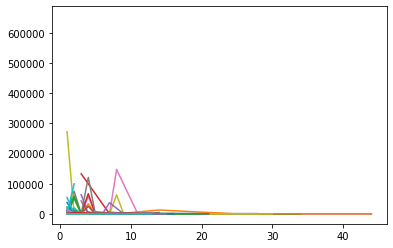

In [26]:
grouped_price = train_data.groupby(["prop_id", "srch_length_of_stay"], as_index = False)["price_usd"].mean()

for i in range(10000):
    if i in grouped_price.prop_id:
        plt.plot(grouped_price.srch_length_of_stay.loc[grouped_price.prop_id == i], grouped_price.price_usd.loc[grouped_price.prop_id == i])

In [27]:
print("Train size:", train_data.shape)
print("Test size:", test_data.shape)

Train size: (4958347, 103)
Test size: (4959183, 99)


In [29]:
train_data.to_csv('data/train_data_preprocessed_norm2.csv')
test_data.to_csv('data/test_data_preprocessed_norm2.csv')